<a href="https://colab.research.google.com/github/Sharddha-Sharddha/IITMLAssignments/blob/main/Classification_model's_comparision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Problem Statement:

Census-income data plays the most important role in the democratic system of government, highly affecting the economic sectors. Census-related figures are used to allocate federal funding by the government to different states and localities.

Census data is also used for post census residents estimates and predictions, economic and social science research, and many other such applications. Therefore, the importance of this data and its accurate predictions is very clear to us. The main aim is to increase awareness about how the income factor actually has an impact not only on the individual lives of citizens but also an effect on the nation and its betterment. You will have a look at the data pulled out from the 1994 Census bureau database, and try to find insights into how various features have an effect on the income of an individual.

The data contains approximately 32,000 observations with over 15 variables.

The strategy is to analyze the data and perform a predictive task of classification to predict whether an individual makes over 50K a year or less by using a logistic regression algorithm.

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/census-income .csv')

In [4]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
print(f'Total no. of employee : {data.shape[0]}')
print(f'Employess having salary less than and equal to 50K : {data[data['annual_income'] == '<=50K'].shape[0]}')
print(f'Employess having salary more than 50K : {data[data['annual_income'] == '>50K'].shape[0]}')

Total no. of employee : 32561
Employess having salary less than and equal to 50K : 24720
Employess having salary more than 50K : 7841


# Task
Perform an exploratory data analysis (EDA) on the `data` DataFrame, including generating descriptive statistics for numerical columns, checking for missing value placeholders (e.g., '?') in object-type columns, visualizing the distribution of the 'annual_income' variable, analyzing the distribution of specified categorical features and their relationship with 'annual_income', analyzing the distribution of numerical features, and finally summarizing the key findings.

**Reasoning**:
To generate descriptive statistics for the numerical columns, I will use the `.describe()` method on the `data` DataFrame as instructed.



In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
data.describe(include = 'O').T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
annual_income,32561,2,<=50K,24720


In [9]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [10]:
data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
data.workclass.unique() # column contain '?' as a placeholder for missing values

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [12]:
data[data['workclass'] == '?'].value_counts().shape[0]


1836

In [13]:
# replacing placeholder '?' with null value
for col in data.columns:
  if data[col].dtype == 'object':
    data[col]= data[col].replace('?',np.nan)

In [14]:
1836+1843+583

4262

In [15]:
# Identifing the missing values
data.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [16]:
from statistics import mode
mode(data['workclass'])

'Private'

In [17]:
mode(data['occupation'])

'Prof-specialty'

In [18]:
mode(data['native-country'])

'United-States'

In [19]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [20]:
#handling Null values of object datatype by replacing it with mode
for col in data.columns:
  if data[col].dtype == 'object':
    data.fillna(mode(data[col]), inplace = True)

In [21]:
data.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [22]:
data.duplicated().sum()

np.int64(24)

In [23]:
data.drop_duplicates(inplace = True)

In [24]:
data.shape[0] # 24 rows removed from the dataset

32537

## Analyze Numerical Features - Box Plots

### Subtask:
For numerical columns (`age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`), use box plots to understand how these numerical features vary across the different 'annual_income' categories.


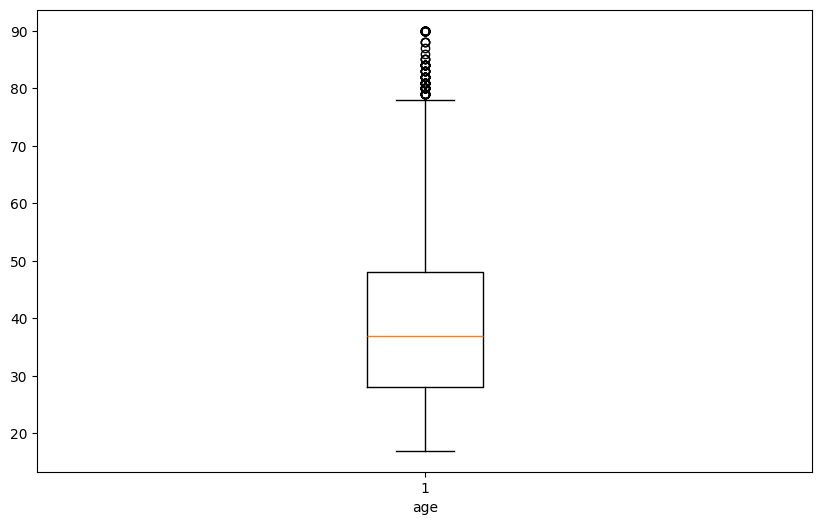

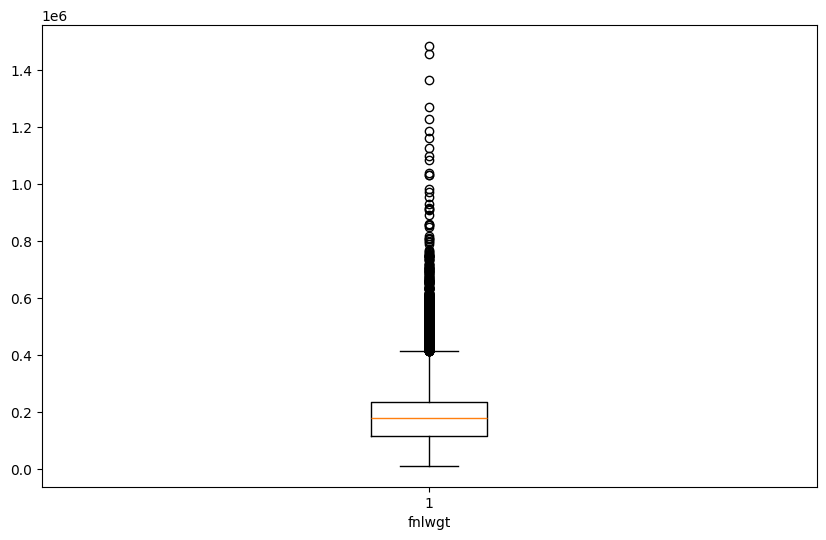

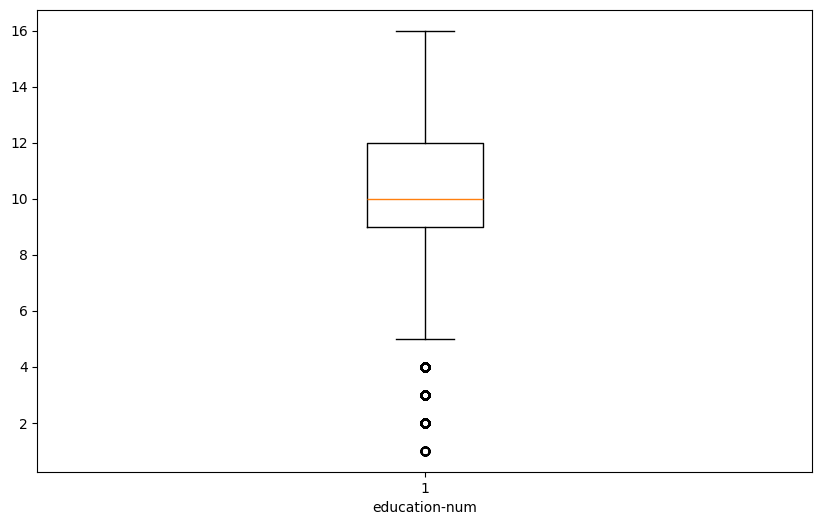

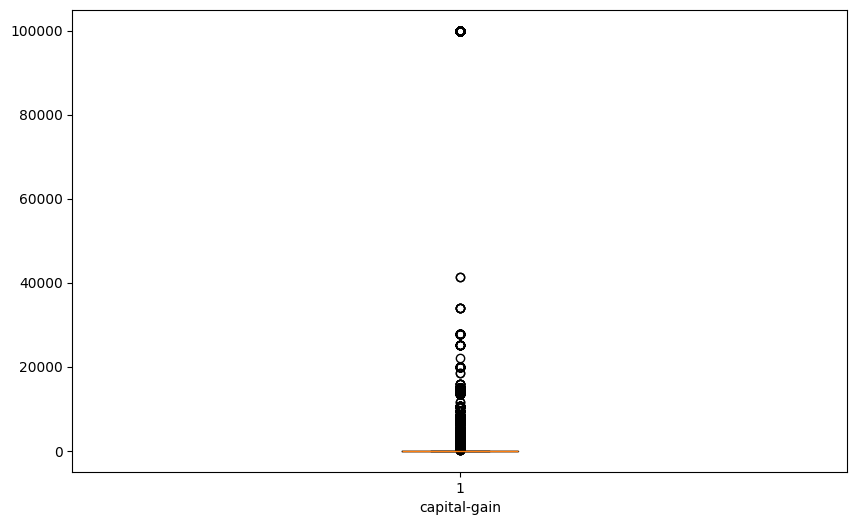

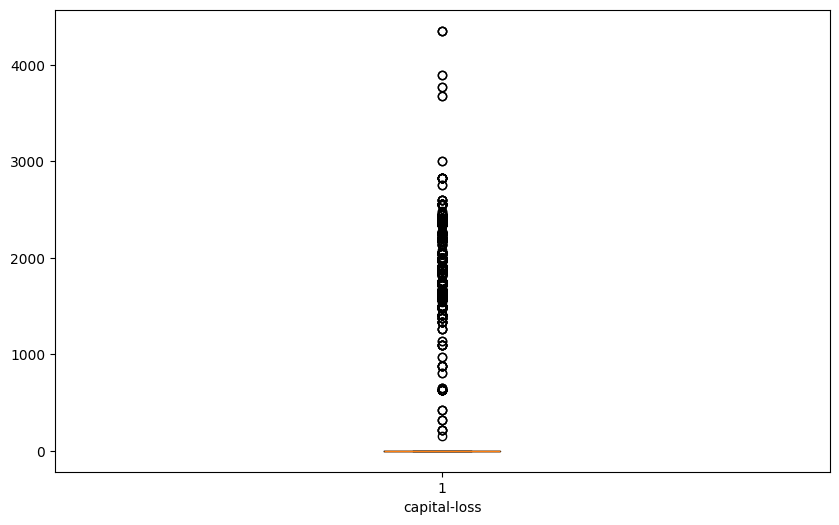

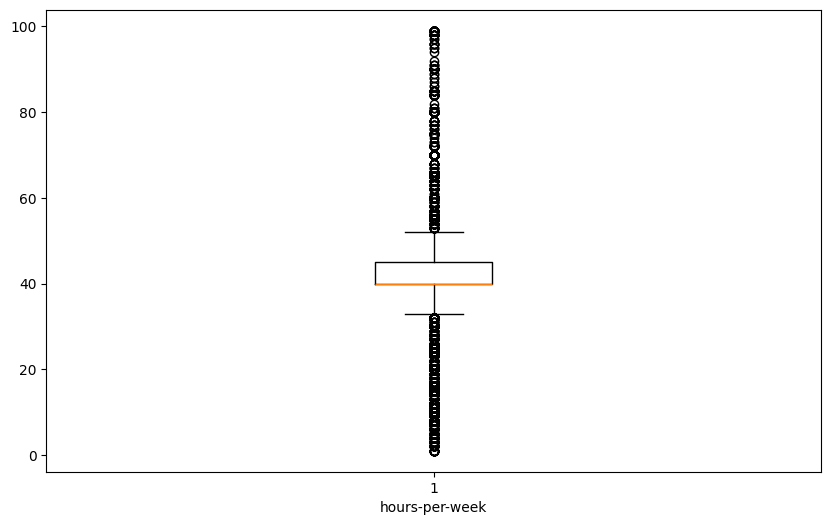

In [25]:
numerical_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for col in numerical_features:
  plt.figure(figsize= (10,6))
  plt.boxplot(data[col])
  plt.xlabel(col)
  plt.show()

In [26]:
outlier_list = ['age','fnlwgt','education-num']

for col in outlier_list:
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  upper_bound = q3 + 1.5 * iqr
  lower_bound = q1 - 1.5 * iqr
  data = data[(data[col]>= lower_bound)&(data[col]<=upper_bound)]

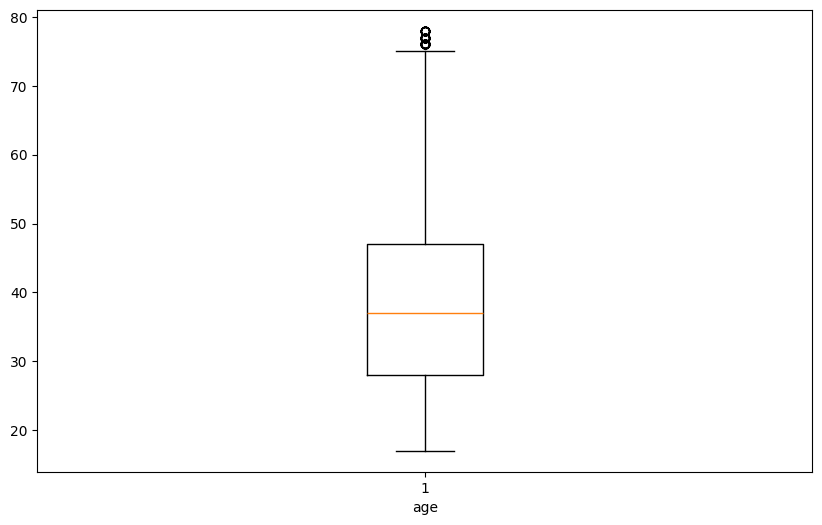

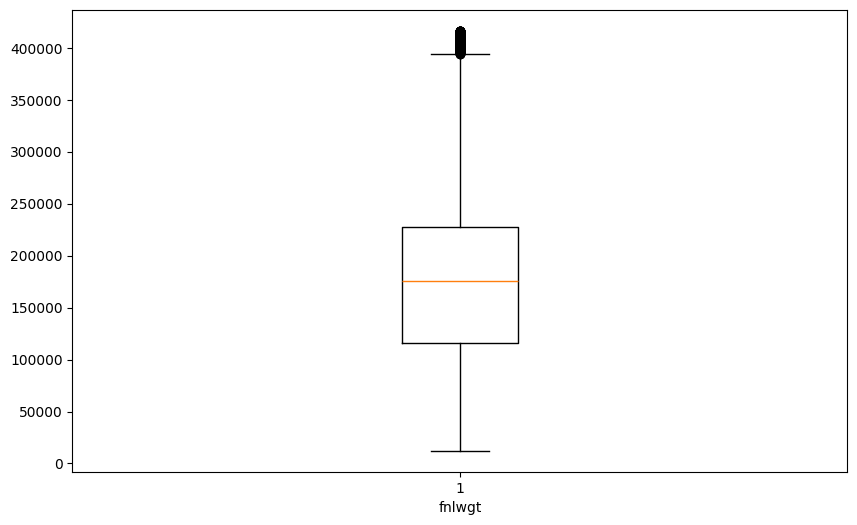

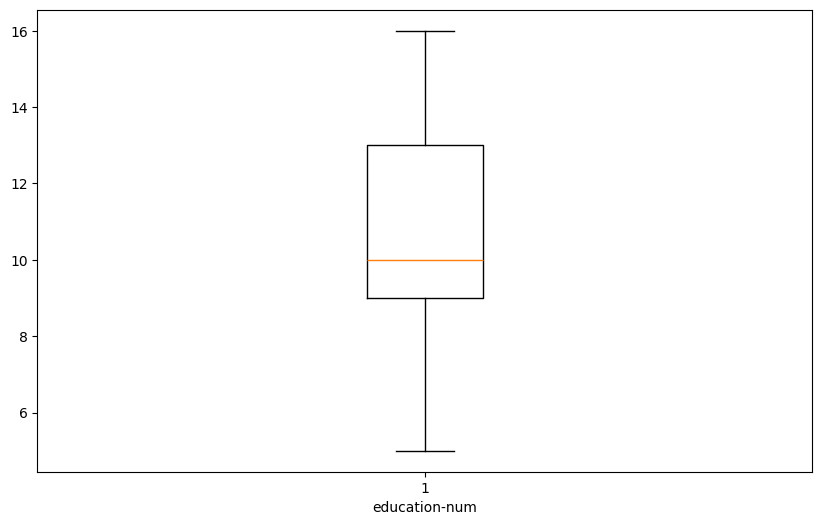

In [27]:
for col in outlier_list:
  plt.figure(figsize= (10,6))
  plt.boxplot(data[col])
  plt.xlabel(col)
  plt.show()

## Visualize Distribution of 'annual_income'

Visualize the distribution of the 'annual_income' variable to understand the proportion of individuals making over 50K a year versus those making 50K or less.


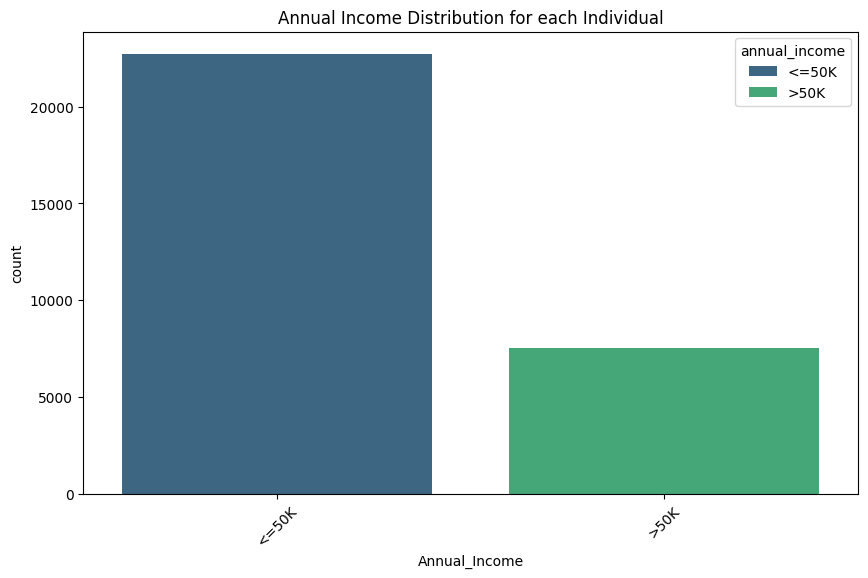

In [28]:
plt.figure(figsize= (10,6))
ax = sns.countplot(data = data, x='annual_income', hue='annual_income', legend = True, palette='viridis')
plt.xlabel('Annual_Income')
plt.title('Annual Income Distribution for each Individual')
plt.xticks(rotation = 45)
plt.show()

## Analyze Distribution of Categorical Features and their Relationship with 'annual_income'

Analyze the distribution of specified categorical features (`workclass`, `education`, `marital-status`, `occupation`, `relationship`, `race`, `sex`, `native-country`) and their relationship with the `annual_income` variable. This will help identify which categorical features are strong indicators of income levels.


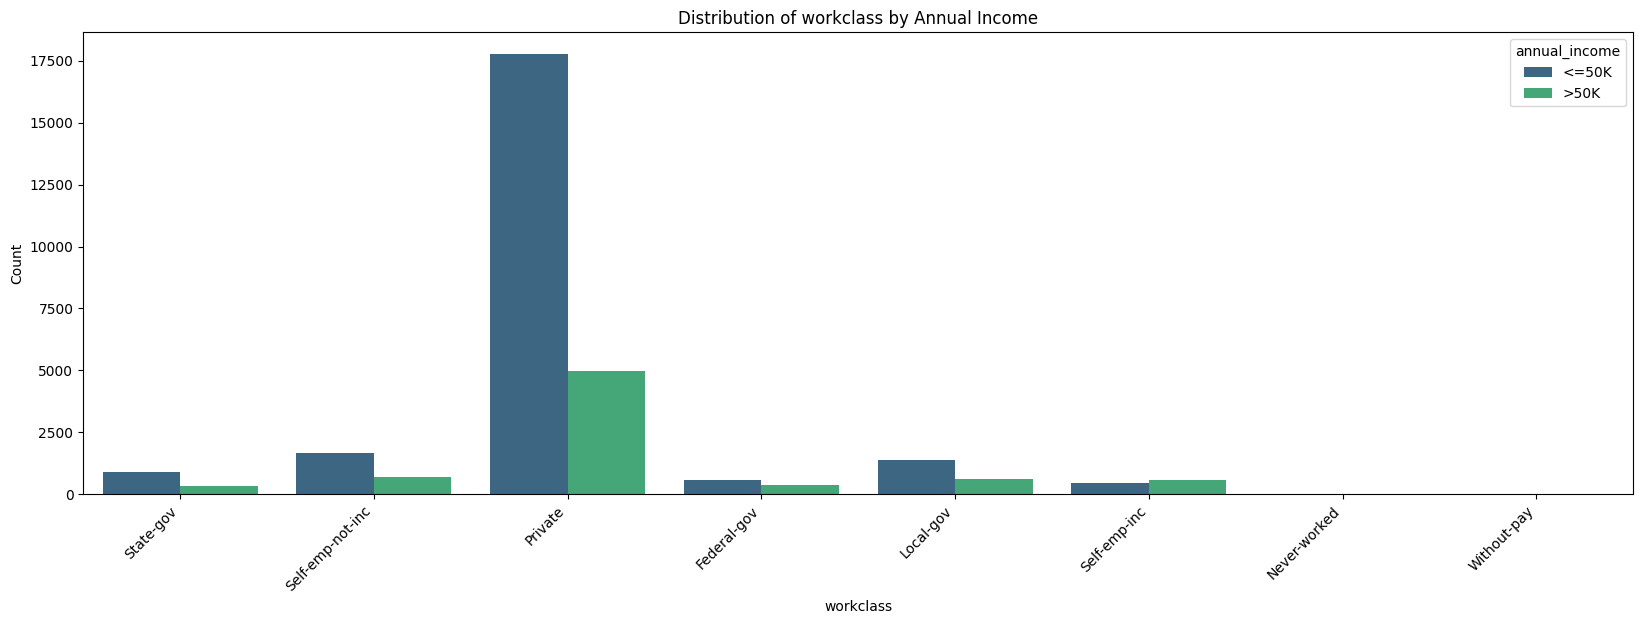

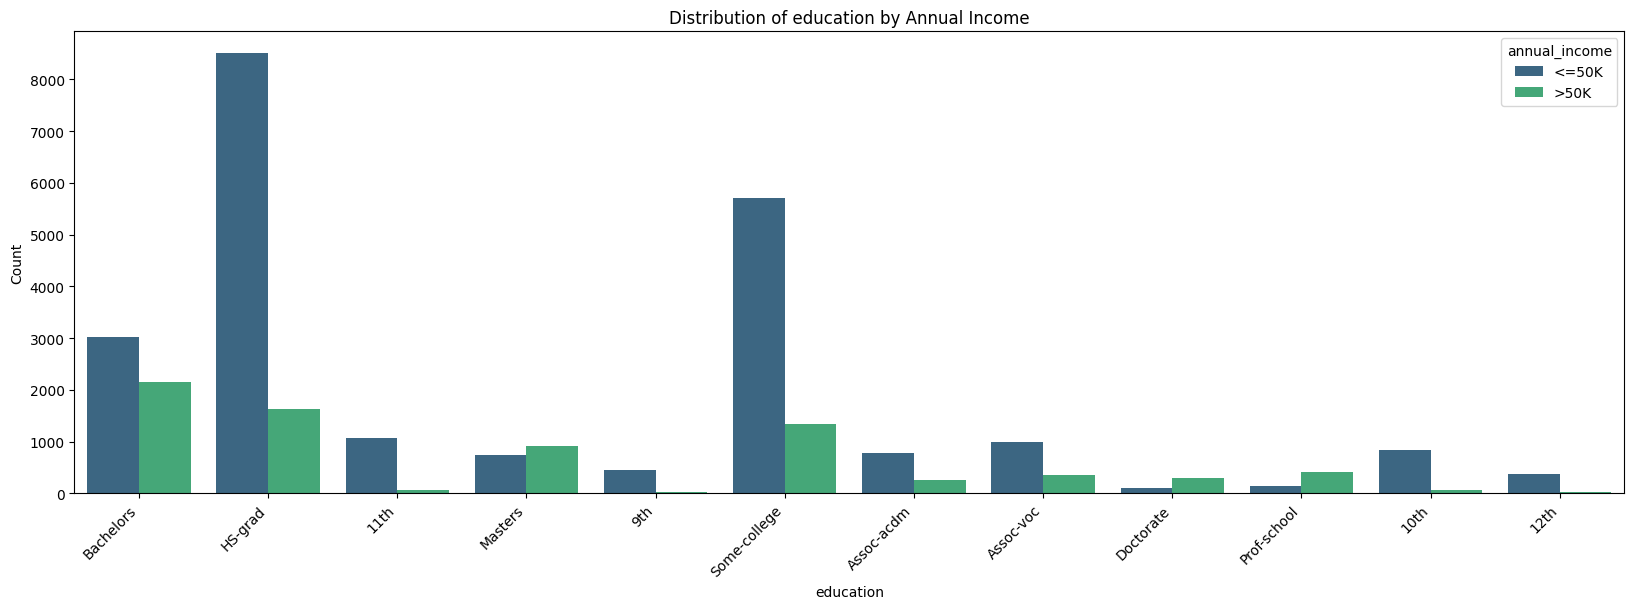

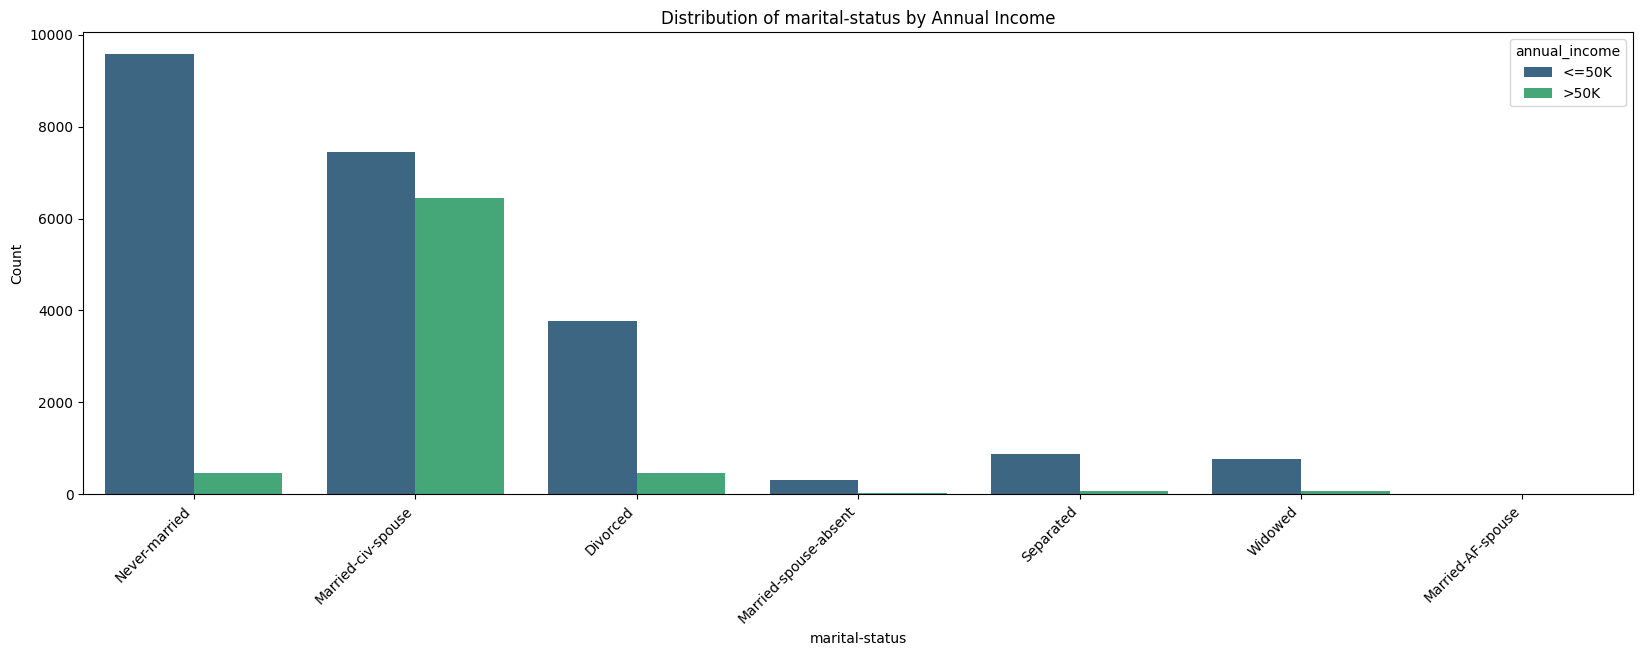

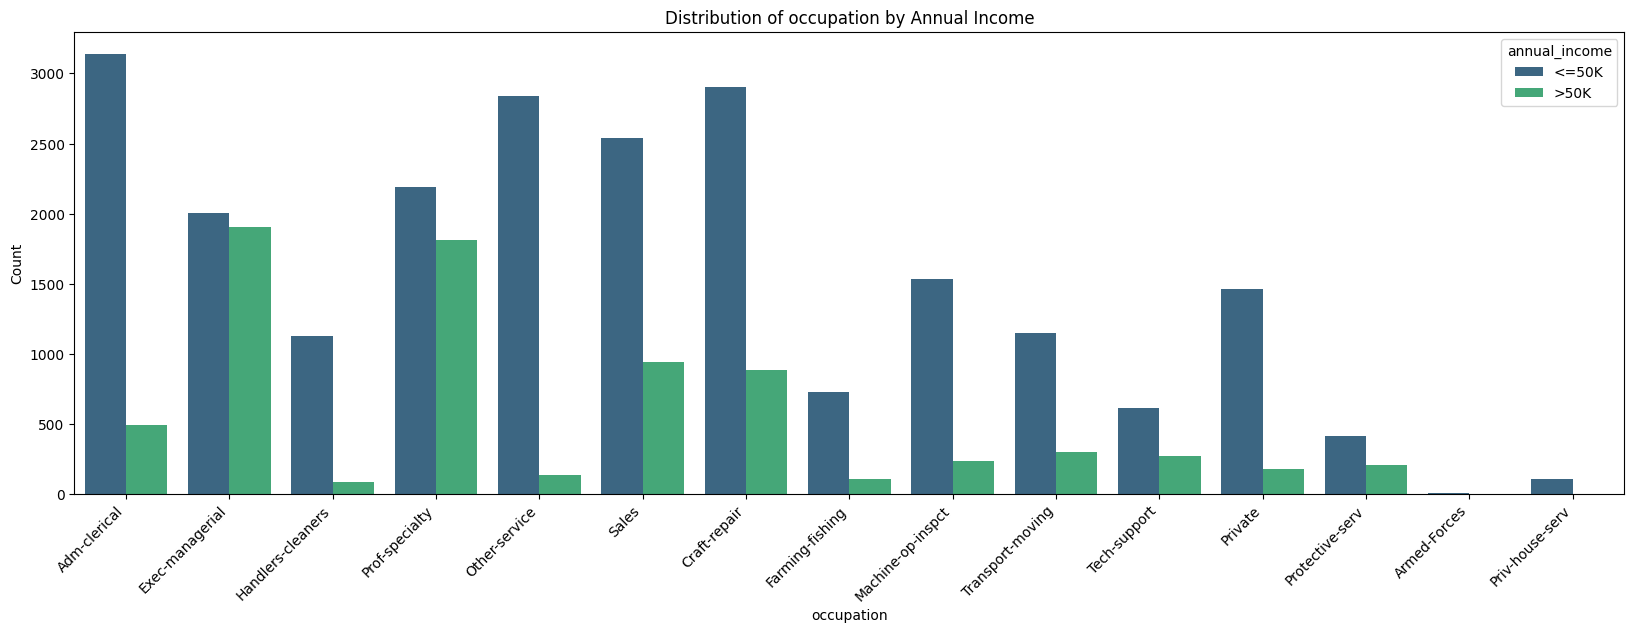

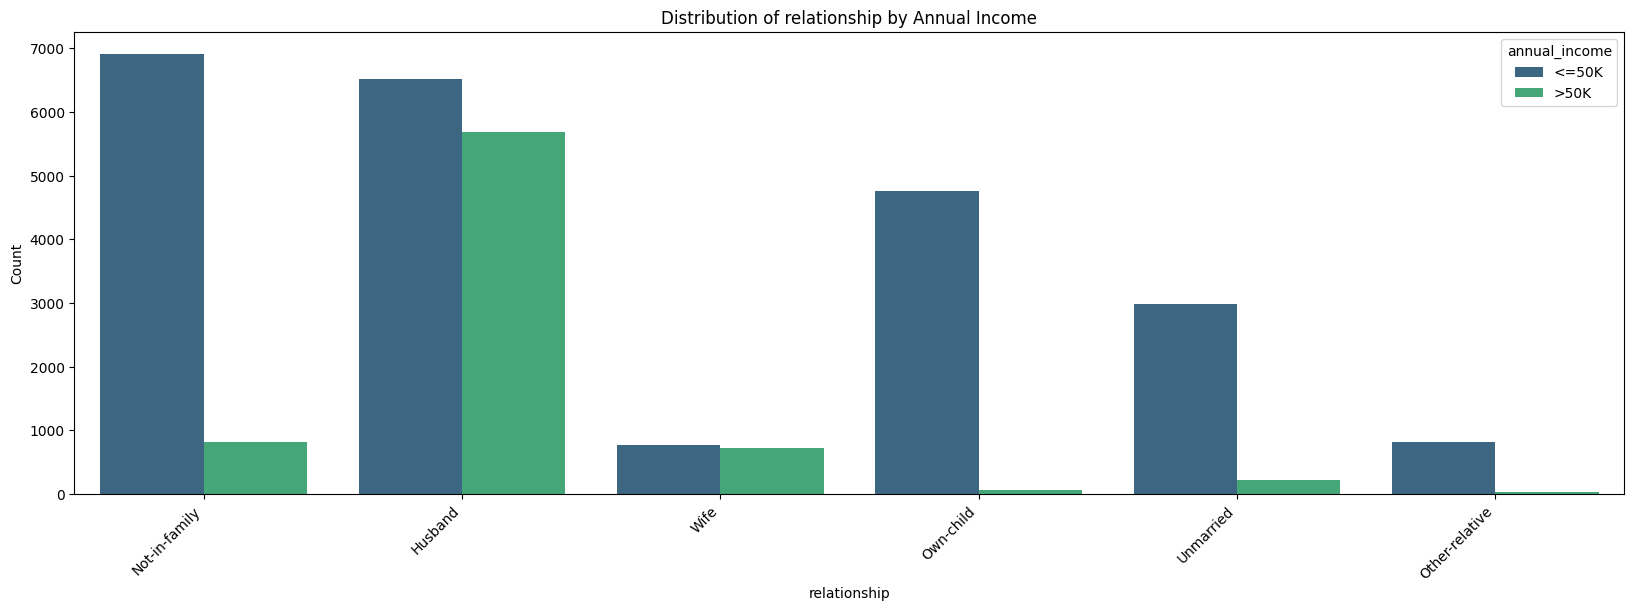

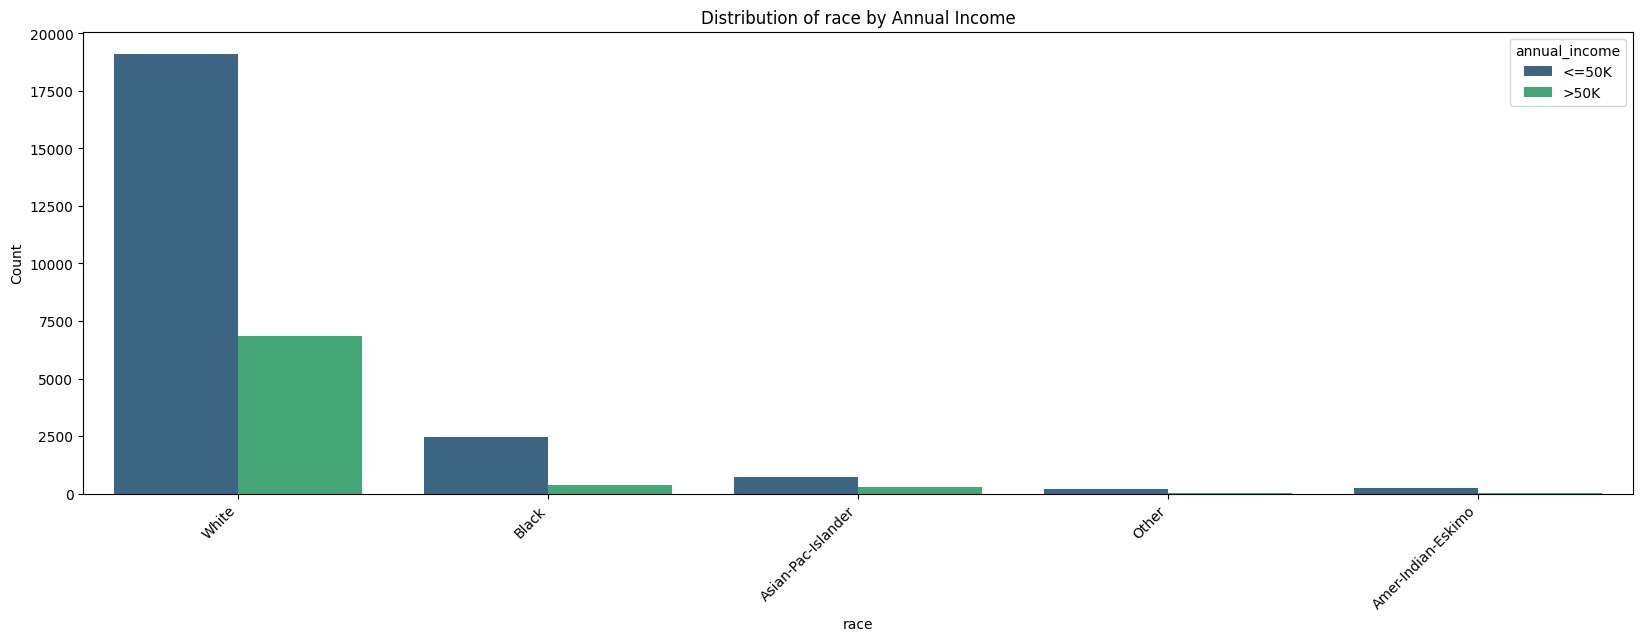

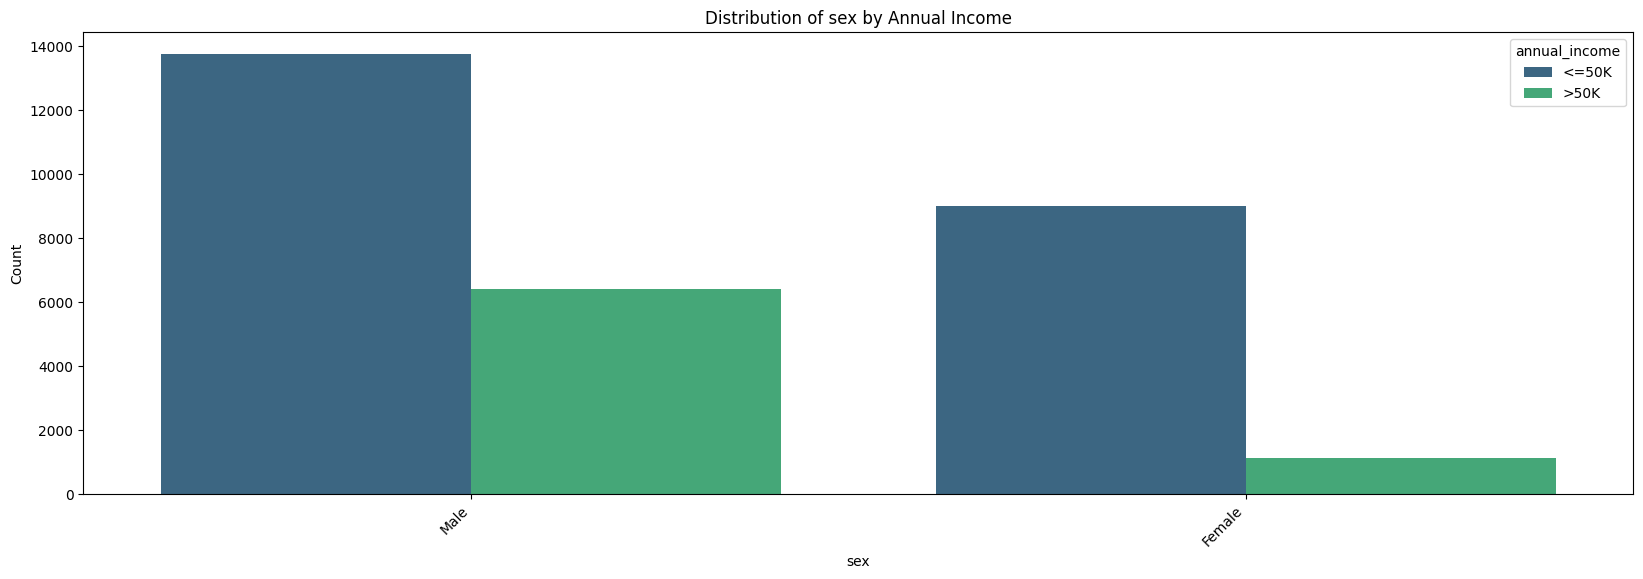

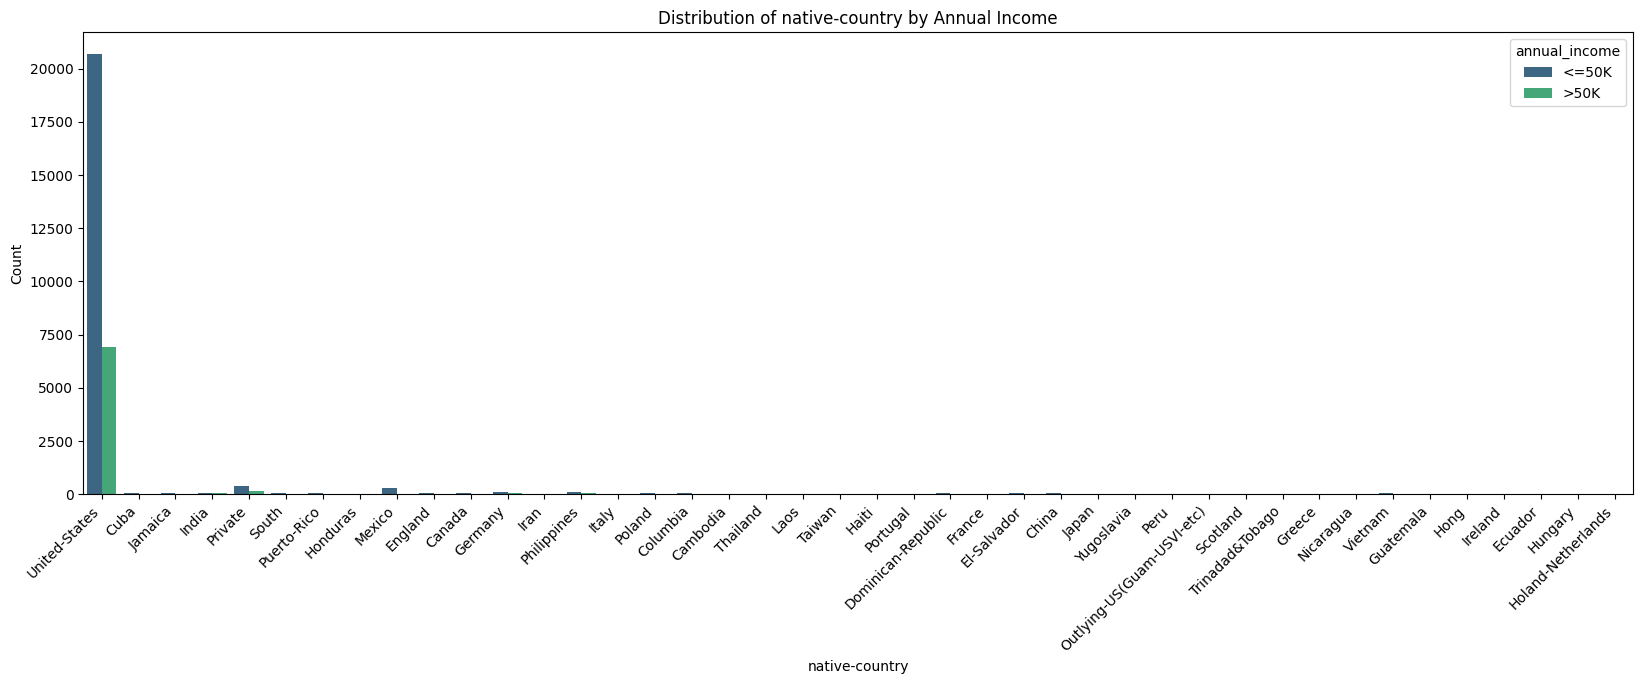

In [29]:
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

for feature in categorical_features:
    plt.figure(figsize=(20, 6))
    sns.countplot(data=data, x=feature, hue='annual_income', palette='viridis')
    plt.title(f'Distribution of {feature} by Annual Income')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate labels and align them to the right for better readability

    plt.show()

## Analyze Distribution of Numerical Features

Analyze the distribution of numerical features (`age`, `fnlwgt`, `education-num`, `capital-gain`, `capital-loss`, `hours-per-week`) to understand their patterns and potential outliers. This will provide insights into the spread and central tendency of these important variables.



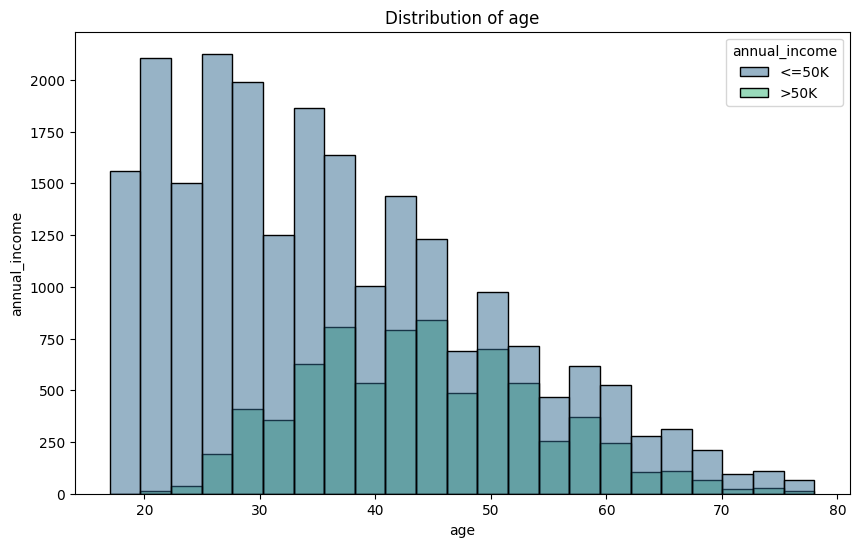

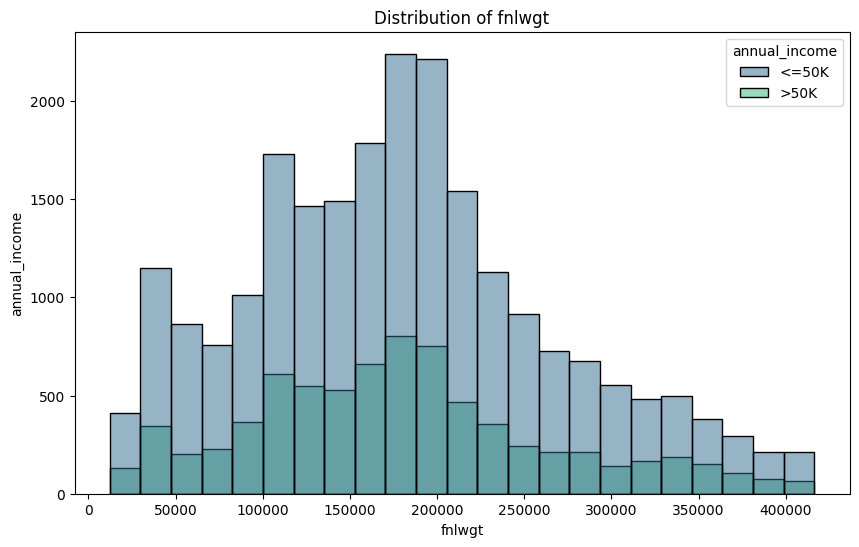

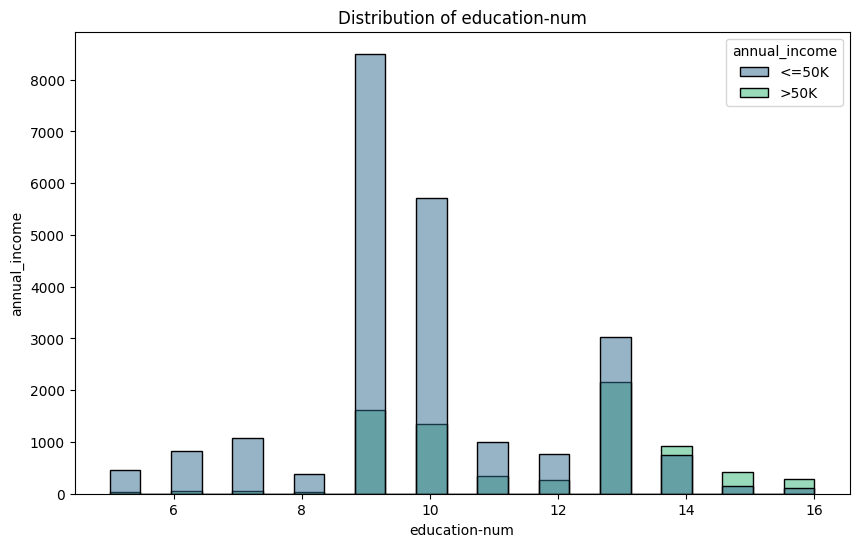

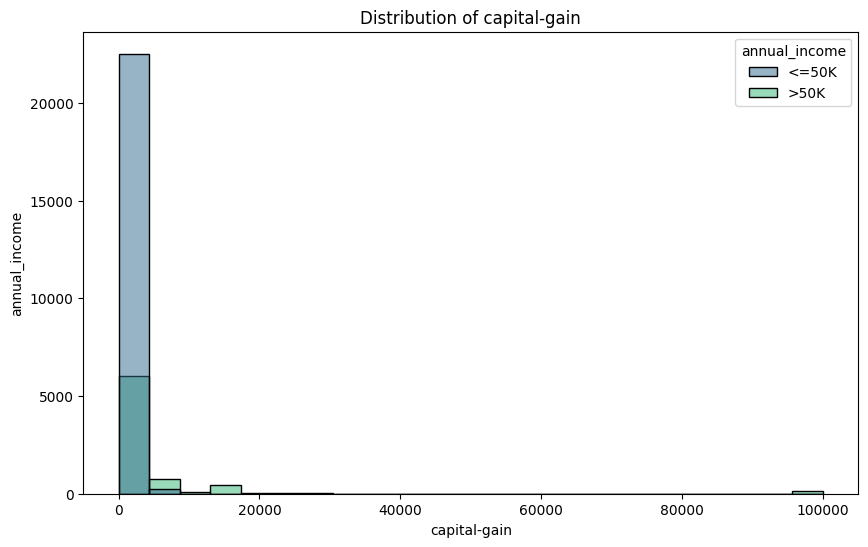

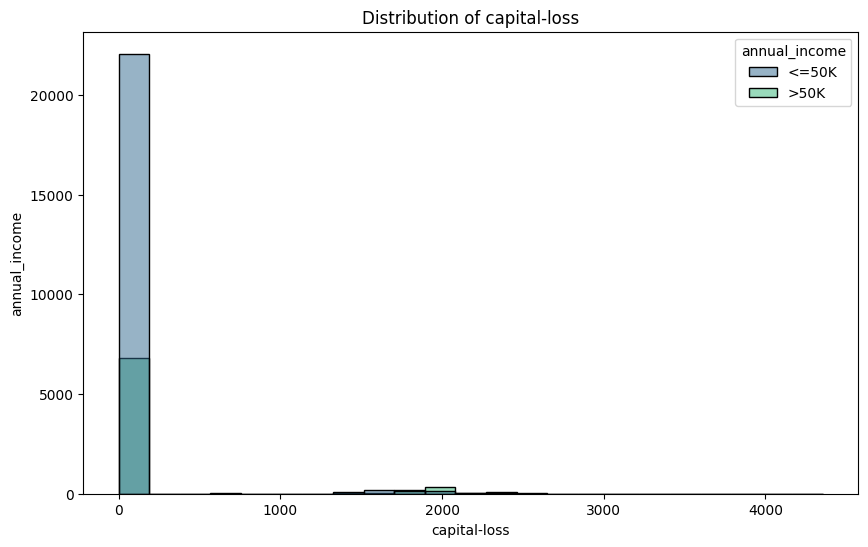

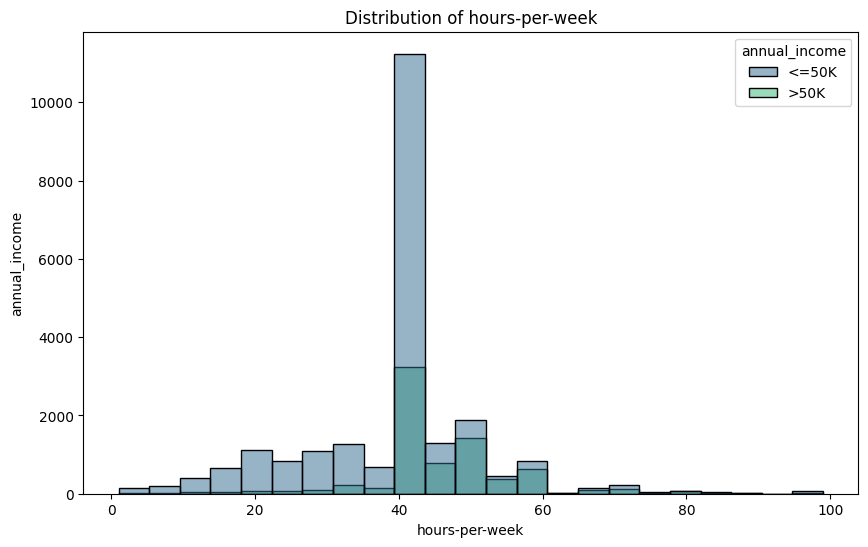

In [30]:
numerical_features = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
for num in numerical_features:
  plt.figure(figsize=(10,6))
  sns.histplot(data= data, x = num, hue = 'annual_income', bins = 23 ,palette = 'viridis', legend = True)
  plt.xlabel(num)
  plt.ylabel('annual_income')
  plt.title(f'Distribution of {num}')
  plt.show()


## Analyze Distribution of Outlier's wrt Annual_income

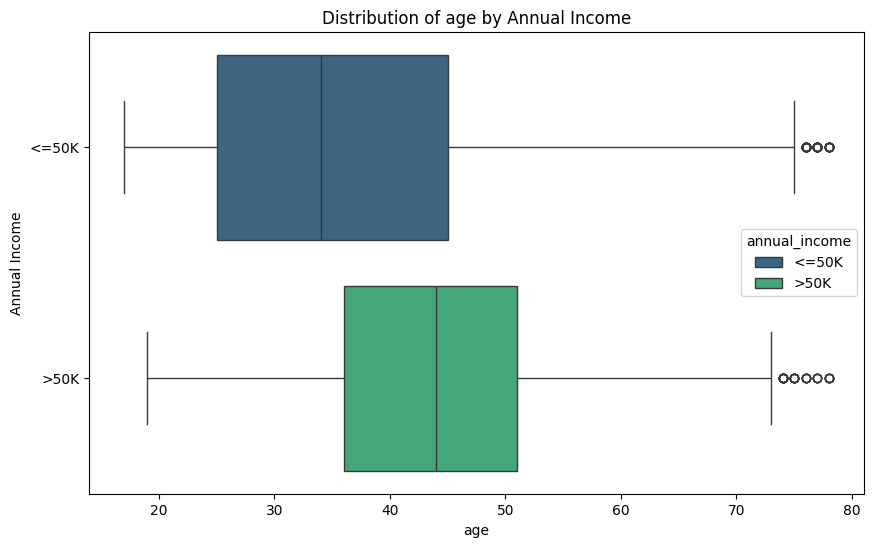

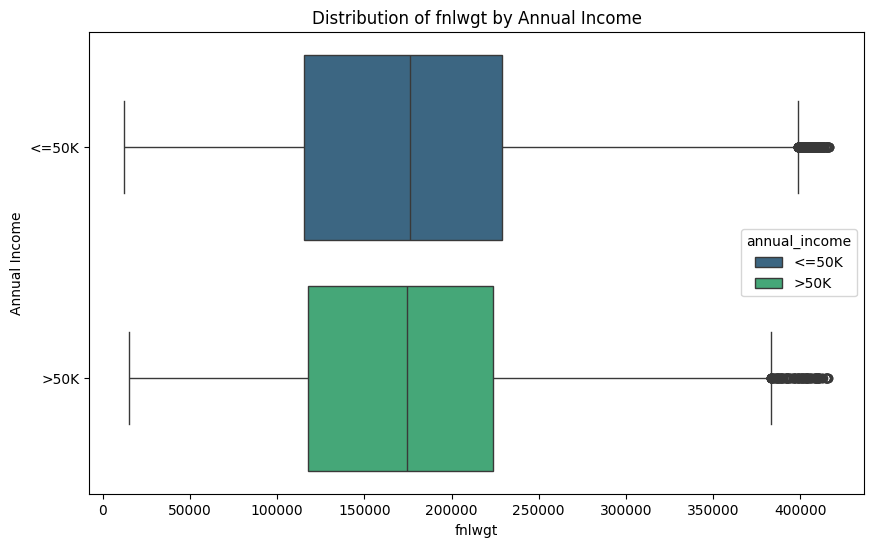

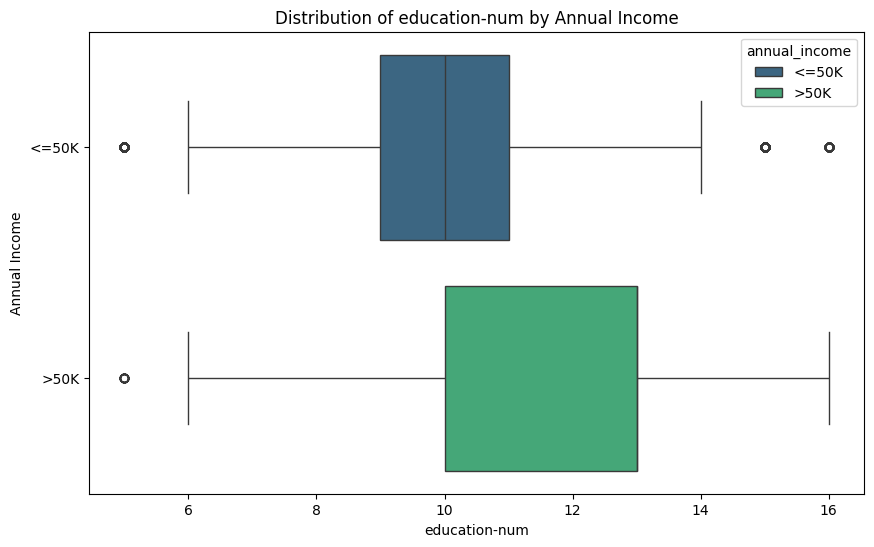

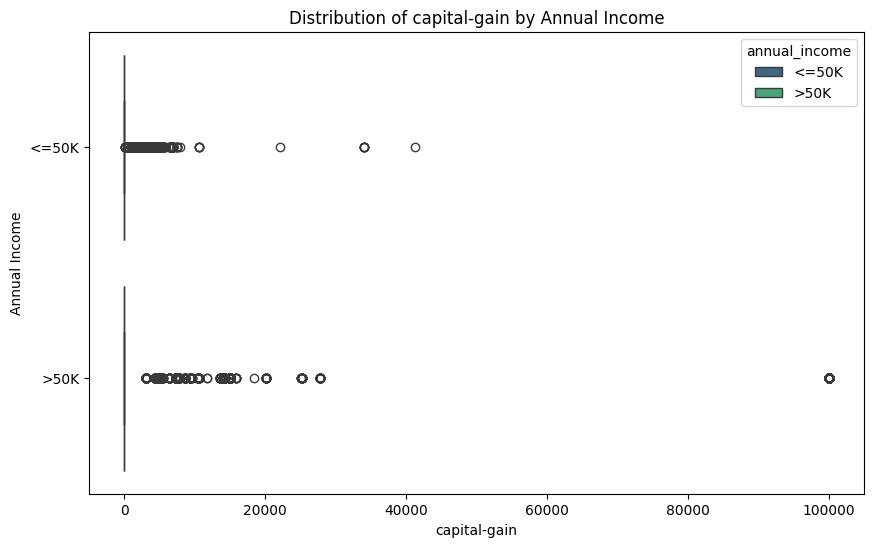

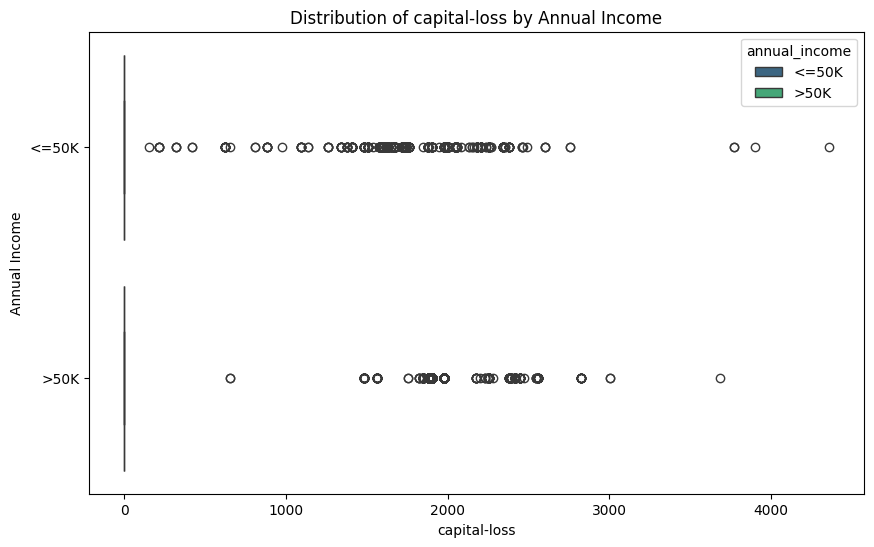

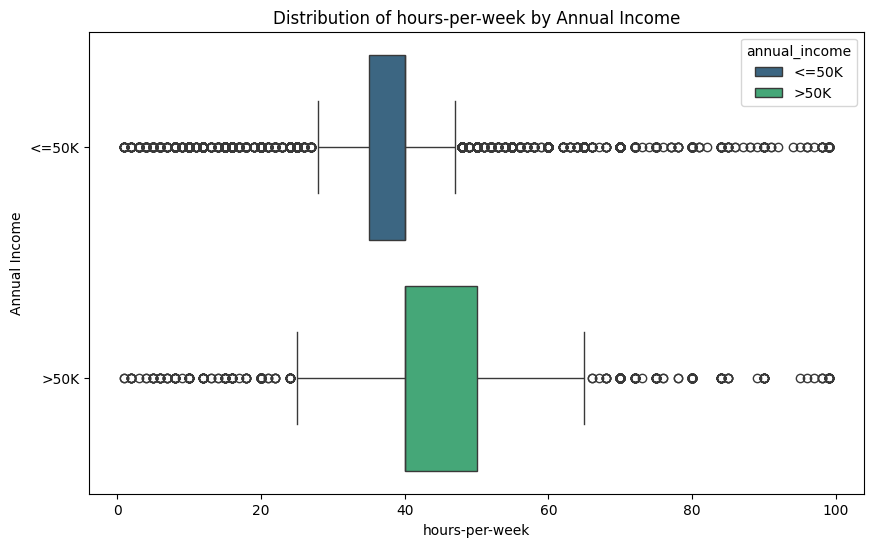

In [31]:
numerical_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=feature, y='annual_income',hue = 'annual_income', palette = 'viridis', legend = True)
    plt.title(f'Distribution of {feature} by Annual Income')
    plt.xlabel(feature)
    plt.ylabel('Annual Income')
    plt.show()

## Summary of Key EDA Findings

Based on our exploratory data analysis, here are the key findings:

1.  **Dataset Overview**: The dataset contains 32,561 entries and 15 columns, with a mix of numerical (6) and object (9) data types. There are no explicit missing values (NaN) at first glance, but further inspection revealed placeholder values.

2.  **Missing Value Placeholders**: Several object-type columns contain '?' as a placeholder for missing values:
    *   `workclass`: 1836 missing values
    *   `occupation`: 1843 missing values
    *   `native-country`: 583 missing values
    These will need to be addressed (e.g., replaced by mode) before modeling.

3.  **Annual Income Distribution**: The target variable `annual_income` is imbalanced, with a significantly larger proportion of individuals earning `<=50K` compared to `>50K`. This imbalance will need to be considered during model training and evaluation.

4.  **Categorical Feature Relationships with Income**:
    *   **Workclass**: Private sector employees are the most numerous in both income categories, but Self-emp-inc and Federal-gov show a higher proportion of individuals earning >50K.
    *   **Education**: People with higher education degrees (like Bachelor’s or Master’s) usually earn more
    *   **Marital Status**: 'Married people (especially married to a civilian spouse) are more likely to make over $50K, while those never married mostly make less.
    *   **Occupation**: 'Jobs like executives and professionals tend to pay more, while service or manual jobs usually pay less.
    *   **Relationship**: 'Being “Husband” in the relationship category usually means higher income, while “Own-child” or “Not-in-family” are mostly lower earners.
    *   **Race**: White and Asian-Pacific Islander groups have more people making over $50K than other races.
    *   **Sex**: Men earn more than women on average
    *   **Native Country**: Most people are from the United States, which is also the country with most high earners.

5.  **Numerical Feature Distributions**:
    *   **Age**: The distribution is right-skewed, with most individuals between 20 and 50 years old. There are outliers up to 90 years old.
    *   **Fnlwgt**: This feature has a wide distribution, indicating varying population weights, and appears right-skewed.
    *   **Education-Num**: Education number has multiple peaks, mostly matching common education levels like high school and college
    *   **Capital-Gain** and **Capital-Loss**: Most people have zero capital gain or loss, but a few have really high values.
    *   **Hours-per-week**: Hours worked per week mostly cluster around 40 hours, but there are people working very few or up to 99 hours a week.



## Building the Machine Learning Model ♟

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30303 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30303 non-null  int64 
 1   workclass       30303 non-null  object
 2   fnlwgt          30303 non-null  int64 
 3   education       30303 non-null  object
 4   education-num   30303 non-null  int64 
 5   marital-status  30303 non-null  object
 6   occupation      30303 non-null  object
 7   relationship    30303 non-null  object
 8   race            30303 non-null  object
 9   sex             30303 non-null  object
 10  capital-gain    30303 non-null  int64 
 11  capital-loss    30303 non-null  int64 
 12  hours-per-week  30303 non-null  int64 
 13  native-country  30303 non-null  object
 14  annual_income   30303 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [34]:
le = LabelEncoder()
for column in data.columns:
  if (data[column].dtype == 'object')& (column != 'annual_income'):
    data[column]= le.fit_transform(data[column])

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30303 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30303 non-null  int64 
 1   workclass       30303 non-null  int64 
 2   fnlwgt          30303 non-null  int64 
 3   education       30303 non-null  int64 
 4   education-num   30303 non-null  int64 
 5   marital-status  30303 non-null  int64 
 6   occupation      30303 non-null  int64 
 7   relationship    30303 non-null  int64 
 8   race            30303 non-null  int64 
 9   sex             30303 non-null  int64 
 10  capital-gain    30303 non-null  int64 
 11  capital-loss    30303 non-null  int64 
 12  hours-per-week  30303 non-null  int64 
 13  native-country  30303 non-null  int64 
 14  annual_income   30303 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


In [36]:
# spliting the data for training the model
x = data.drop(['annual_income'], axis = 1)
y = data['annual_income']

## checking for Multicolinearity (VIF)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,9.729061
1,workclass,8.342566
2,fnlwgt,4.973533
3,education,8.108758
4,education-num,22.326434
5,marital-status,4.140035
6,occupation,3.214053
7,relationship,2.698341
8,race,18.711601
9,sex,4.450919


The data shows high correlation which can harm prediction, so remove any columns with VIF > 5, recompute VIF, and keep removing the highest‑VIF column and repeating until all VIFs are below 5; if too many features are lost, use PCA or a regularized model instead.




In [39]:
x = x.drop(['native-country'], axis = 1)

In [40]:
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,9.284745
1,workclass,8.214667
2,fnlwgt,4.931859
3,education,7.975314
4,education-num,21.597510
5,marital-status,4.005233
6,occupation,3.202608
7,relationship,2.564541
8,race,16.081467
9,sex,4.382345


In [41]:
x = x.drop(['education-num'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,8.711376
1,workclass,8.127336
2,fnlwgt,4.888590
3,education,7.217659
4,marital-status,3.925634
5,occupation,3.101406
6,relationship,2.545683
7,race,15.263136
8,sex,4.377135
9,capital-gain,1.035638


In [42]:
x = x.drop(['race'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,8.020641
1,workclass,7.790349
2,fnlwgt,4.789261
3,education,6.972422
4,marital-status,3.815819
5,occupation,3.073980
6,relationship,2.479475
7,sex,4.262853
8,capital-gain,1.034918
9,capital-loss,1.058133


In [43]:
x = x.drop(['hours-per-week'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,7.233776
1,workclass,7.454038
2,fnlwgt,4.693740
3,education,6.595980
4,marital-status,3.805378
5,occupation,3.047194
6,relationship,2.461412
7,sex,3.936783
8,capital-gain,1.033482
9,capital-loss,1.056575


In [44]:
x = x.drop(['workclass'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,age,6.449813
1,fnlwgt,4.630535
2,education,6.342116
3,marital-status,3.698344
4,occupation,3.021655
5,relationship,2.382783
6,sex,3.732969
7,capital-gain,1.033263
8,capital-loss,1.056567


In [45]:
x = x.drop(['age'], axis = 1)
vif = pd.DataFrame()
vif['Features'] = x.columns
vif['Multicolinearity'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,Features,Multicolinearity
0,fnlwgt,4.383135
1,education,5.252222
2,marital-status,3.697783
3,occupation,2.904694
4,relationship,2.366601
5,sex,3.450475
6,capital-gain,1.028259
7,capital-loss,1.052190


In [46]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.20, random_state = 42, stratify = y)

In [47]:
x_train.shape

(24242, 8)

In [48]:
x_test.shape

(6061, 8)

In [49]:
y_train.shape

(24242,)

In [50]:
y_test.shape

(6061,)

#### **Standardization / Scaling of the data**

In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [52]:
log_model = LogisticRegression()
log_model.fit(x_train_scaled,y_train)
y_pred = log_model.predict(x_test_scaled)


In [53]:
log_model.coef_ #prints w1 to w8

array([[ 0.01351579,  0.10868457, -0.44879032,  0.08835281, -0.42540156,
         0.3472518 ,  2.62140559,  0.33732135]])

In [54]:
log_model.intercept_  #prints c value

array([-1.17953953])

In [55]:
log_model.predict_proba(x_test_scaled)

array([[0.90151268, 0.09848732],
       [0.94012542, 0.05987458],
       [0.7113421 , 0.2886579 ],
       ...,
       [0.69488842, 0.30511158],
       [0.91838281, 0.08161719],
       [0.37664421, 0.62335579]])

In [56]:
pd.DataFrame({'Actual' : y_test,
              'Predicted' : y_pred})

,Actual,Predicted
26529,<=50K,<=50K
7485,>50K,<=50K
8425,<=50K,<=50K
8218,<=50K,<=50K
20551,<=50K,<=50K
...,...,...
12379,<=50K,<=50K
30605,<=50K,<=50K
12363,>50K,<=50K
31154,<=50K,<=50K


In [57]:
accuracy_score(y_test,y_pred)

0.7975581587196833

In [58]:
cf = confusion_matrix(y_test,y_pred)
cf

array([[4428,  124],
       [1103,  406]])

In [59]:
print(f' Total incorrect prediction : {cf[0,1] + cf[1,0]}')

 Total incorrect prediction : 1227


In [60]:
4428+406

4834

## Quiz question


Q1: How many types of occupations do we have?

In [61]:
data.occupation.nunique()

15

Q2: How many people are working as tech support and have an annual income greater than 50k?

In [62]:
data[(data['occupation'] == 'Tech-support') & (data['annual_income']=='>50')].value_counts().shape[0]

0

5)  How many people are having private work classes and are not from the United States of America?

In [63]:
data[(data['workclass'] == 'Private') & (data['native-country'] != 'united_state')].shape[0]

0

6) How many people are either having Annual Income(last column) less than or equal to 50k or their working hours is greater than or equal to 40 hrs:

In [64]:
data[(data['annual_income'] == '<=50K')&(data['hours-per-week']>=40)].shape[0]

16333

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30303 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30303 non-null  int64 
 1   workclass       30303 non-null  int64 
 2   fnlwgt          30303 non-null  int64 
 3   education       30303 non-null  int64 
 4   education-num   30303 non-null  int64 
 5   marital-status  30303 non-null  int64 
 6   occupation      30303 non-null  int64 
 7   relationship    30303 non-null  int64 
 8   race            30303 non-null  int64 
 9   sex             30303 non-null  int64 
 10  capital-gain    30303 non-null  int64 
 11  capital-loss    30303 non-null  int64 
 12  hours-per-week  30303 non-null  int64 
 13  native-country  30303 non-null  int64 
 14  annual_income   30303 non-null  object
dtypes: int64(14), object(1)
memory usage: 3.7+ MB


Decision Tree

In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [80]:

DT = DecisionTreeClassifier()
RF = RandomForestClassifier(n_estimators= 100, random_state = 0)
grid_params = {'criterion': ['gini','entropy'],
               'min_samples_leaf' : [1,3,5],
               'min_samples_split' : [2,3,6,8,9],
               'max_depth': [2,5,7],
               'max_features':[3,5,7,9],
               'random_state' : [0,42,100]} #

RS = RandomizedSearchCV(estimator = RF, param_distributions =  grid_params, n_jobs = -1, cv = 3, n_iter = 20)


model_list = [DT,RF,RS]

for i in model_list:
  i.fit(x_train,y_train)
  y_pred = i.predict(x_test)
  accuracy = accuracy_score(y_test,y_pred)
  print(i , accuracy)





RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 5, 7],
                                        'max_features': [3, 5, 7, 9],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [2, 3, 6, 8, 9],
                                        'random_state': [0, 42, 100]}) 0.8419402738821976
RandomForestClassifier(max_depth=7, max_features=9, min_samples_split=9,
                       random_state=0)
{'random_state': 0, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 9, 'max_depth': 7, 'criterion': 'gini'}


In [89]:
Final_params = {'random_state': [0], # Corrected: Wrapped 0 in a list
                'min_samples_split': [9],
                'min_samples_leaf': [1],
                'max_features': [9],
                'max_depth': [7],
                'criterion': ['gini']}
# Initialize RandomForestClassifier with correct parameter for random_state
RF_final = RandomForestClassifier(random_state=0)
Final_model = RandomizedSearchCV(estimator=RF_final, param_distributions=Final_params, cv=3, n_jobs=-1, n_iter=1)
Final_model.fit(x_train, y_train)
y_pred = Final_model.predict(x_test)
Final_accuracy = accuracy_score(y_test, y_pred)
print('Final_Accuracy',Final_accuracy)

Final_Accuracy 0.8419402738821976
